## Importing libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Dataset characteristics

* Number of instances
    - 20640

* Number of attributes
    - 8 numeric, predictive attritbutes and the target

* Attribute information
    - MedInc median income in block
    - HouseAge median house age in block
    - AveRooms average number of rooms
    - AveBedrms average number of bedrooms
    - Population block population
    - AveOccup average house occupancy
    - Latitude house block latitude
    - Longitude house block longitutde

* Target
    - The target variable is the median house value in units of 1000,000 for california districts

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
X_train.shape

(11610, 8)

## Creating model

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=[8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)                                                 
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics = ['mae'])

#lr = learning rate

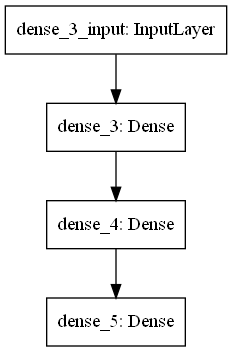

In [22]:
import pydot
keras.utils.plot_model(model)

In [27]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3784 - mae: 0.4397 - val_loss: 0.4362 - val_mae: 0.4741
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3772 - mae: 0.4384 - val_loss: 0.4372 - val_mae: 0.4810
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3759 - mae: 0.4383 - val_loss: 0.4351 - val_mae: 0.4743
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3743 - mae: 0.4367 - val_loss: 0.4359 - val_mae: 0.4793
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3735 - mae: 0.4361 - val_loss: 0.4330 - val_mae: 0.4751
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3719 - mae: 0.4353 - val_loss: 0.4330 - val_mae: 0.4732
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3712 - mae: 0.4344 - val_loss: 0.4320 - val_mae: 0.4737
Epoch 8/30
363/363 [==============================] - 2s 4ms/step - loss: 0.

In [28]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4402 - mae: 0.4738


In [29]:
model_history.history

{'loss': [0.37842506170272827,
  0.3772231638431549,
  0.37593942880630493,
  0.3743075728416443,
  0.3735372722148895,
  0.37194713950157166,
  0.3711744248867035,
  0.3701426386833191,
  0.3689679503440857,
  0.3680371344089508,
  0.3673383295536041,
  0.36627447605133057,
  0.3654114007949829,
  0.36446699500083923,
  0.36378014087677,
  0.36277732253074646,
  0.362110435962677,
  0.36175987124443054,
  0.3606036901473999,
  0.360098659992218,
  0.3593679666519165,
  0.35869544744491577,
  0.35810011625289917,
  0.3573246896266937,
  0.35663026571273804,
  0.3561754822731018,
  0.35578253865242004,
  0.3550663888454437,
  0.35456329584121704,
  0.3537389934062958],
 'mae': [0.43968796730041504,
  0.4384339451789856,
  0.4382833242416382,
  0.4366830885410309,
  0.4361131191253662,
  0.43534961342811584,
  0.43438491225242615,
  0.4339718520641327,
  0.4332049787044525,
  0.43244507908821106,
  0.4316970705986023,
  0.4308076500892639,
  0.4303346276283264,
  0.4294669032096863,
  0.

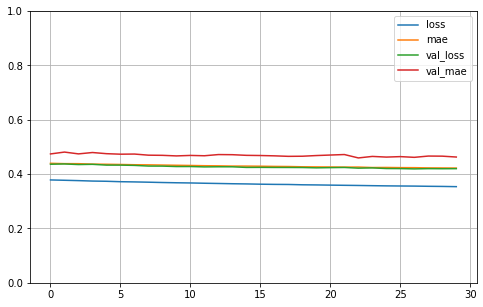

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
X_new = X_test[:3]

In [32]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.77052236]
 [1.7775463 ]
 [2.812307  ]]
[0.477   0.458   5.00001]
